# F1 Data Analysis: F1 Ferrari Drivers

**Import libraries**

Start by importing the necessary libraries for data analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fastf1
from fastf1.core import Laps

**Creating / Enabling Caching**

FastF1 can cache data to speed up future runs.

In [2]:
fastf1.Cache.enable_cache('cache')  # 'cache' is the folder name

**Load the Qualifying Session**

Choose the year, Grand Prix, and session type.

In [3]:
session = fastf1.get_session(2024, 'Monaco', 'Q') # get_session(year, 'gran prix', 'Q = Qualifyer or R = Race')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Qualifying [v3.6.0]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '31', '3', '18', '27', '14', '2', '20', '11', '77', '24']


**Select Drivers**

Pick the two drivers you want to compare.

In [4]:
ferrari_one = 'LEC' # Charles Leclerc
ferrari_two = 'HAM' # Lewis Hamilton

**Get all laps and filter for fastest lap**

Extract laps for each driver and find their fastest lap.

In [5]:
laps_driver1 = session.laps.pick_driver(ferrari_one).sort_values('LapTime').iloc[0]
laps_driver2 = session.laps.pick_driver(ferrari_two).sort_values('LapTime').iloc[0]

d:\Development\python\learn pandas\fastF1\f1env\Lib\site-packages\fastf1\core.py:3183: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


**Merge lap data for comparison**

Combine the fastest laps into a single DataFrame for analysis.



In [6]:
fastest_laps = pd.DataFrame([laps_driver1, laps_driver2])

**Plot lap times**

Visualize the lap times for comparison.

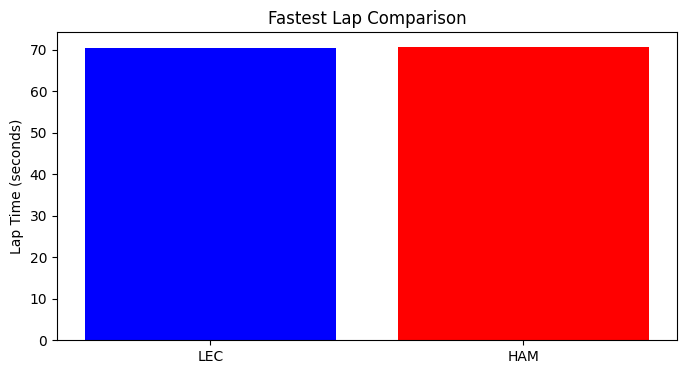

In [7]:
plt.figure(figsize=(8, 4))
plt.bar([ferrari_one, ferrari_two], fastest_laps['LapTime'].dt.total_seconds(), color=['blue', 'red'])
plt.ylabel('Lap Time (seconds)')
plt.title('Fastest Lap Comparison')
plt.show()

**Plot Telemetry Data**

plot telemetry (speed, throttle, etc.) for both drivers.

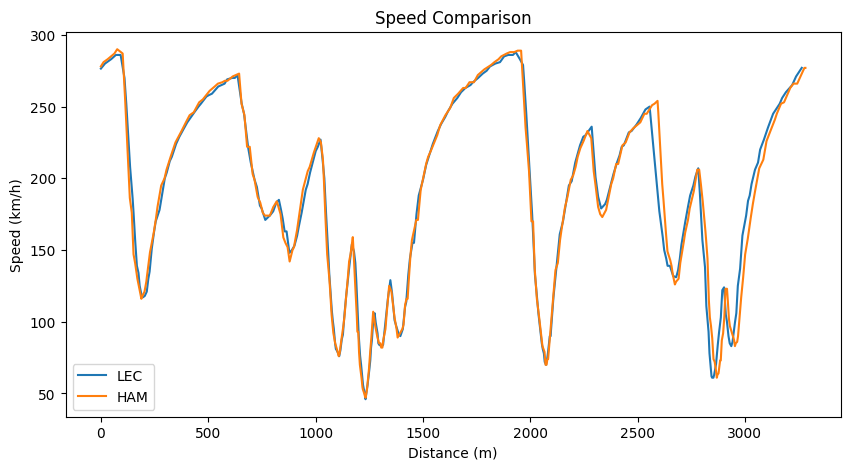

In [8]:
tel1 = laps_driver1.get_telemetry()
tel2 = laps_driver2.get_telemetry()

plt.figure(figsize=(10, 5))
plt.plot(tel1['Distance'], tel1['Speed'], label=ferrari_one)
plt.plot(tel2['Distance'], tel2['Speed'], label=ferrari_two)
plt.xlabel('Distance (m)')
plt.ylabel('Speed (km/h)')
plt.title('Speed Comparison')
plt.legend()
plt.show()